In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import UndefinedMetricWarning
import numpy as np

In [2]:
# Read in data
df = pd.read_csv('mbti_1.csv')
print(df.head())


   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...


In [3]:
# Extract features and target variable
X = df['posts']
y = df['type']


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Convert text data into numerical format using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000) 
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [6]:
# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)  
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [7]:
# Use the trained model to make predictions on the test data
predictions = model.predict(X_test_tfidf)


In [8]:
# Filter out UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
# Assess the model's performance using accuracy and other relevant metrics
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.6190201729106628
Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.40      0.05      0.09        41
        ENFP       0.73      0.58      0.65       125
        ENTJ       0.77      0.23      0.35        44
        ENTP       0.68      0.53      0.59       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       1.00      0.07      0.12        15
        INFJ       0.62      0.66      0.64       288
        INFP       0.55      0.88      0.68       370
        INTJ       0.60      0.69      0.64       193
        INTP       0.66      0.80      0.72       293
        ISFJ       1.00      0.13      0.24        45
        ISFP       0.57      0.08      0.13        53
        ISTJ       0.80      0.09      0.16        44
        ISTP       0.79      0.33      0.46        67

    accuracy                

In [9]:
# creating parameter grid that will try different params 
param_grid = {'C': [0.1, 1, 10], 'max_iter': [100, 500, 1000]}


In [10]:
# testing to find best parameters
grid_search = GridSearchCV(LogisticRegression(solver = 'liblinear', max_iter = 100), param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)



GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 500, 1000]})

In [11]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


This is the result of training the model using the best possible parameters. 

In [12]:
# Filter out UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Use the best model to make predictions
predictions = best_model.predict(X_test_tfidf)

# Assess the model's performance using accuracy and other relevant metrics
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Best Parameters: {'C': 10, 'max_iter': 100}
Accuracy: 0.6570605187319885
Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.60      0.22      0.32        41
        ENFP       0.70      0.65      0.68       125
        ENTJ       0.69      0.45      0.55        44
        ENTP       0.66      0.57      0.61       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       0.60      0.20      0.30        15
        INFJ       0.65      0.68      0.66       288
        INFP       0.65      0.82      0.72       370
        INTJ       0.60      0.69      0.64       193
        INTP       0.68      0.80      0.73       293
        ISFJ       0.92      0.49      0.64        45
        ISFP       0.68      0.32      0.44        53
        ISTJ       0.75      0.34      0.47        44
        ISTP       0.72      0.49      

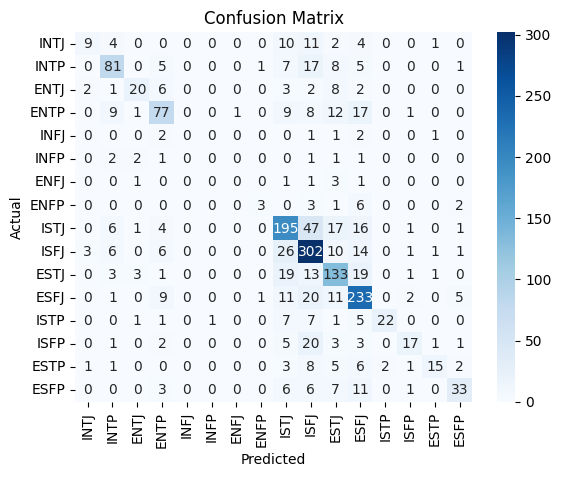

In [15]:
# Assuming you already have the best model and predictions
predictions = best_model.predict(X_test_tfidf)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

mbti_types = ['INTJ', 'INTP', 'ENTJ', 'ENTP', 'INFJ', 'INFP', 'ENFJ', 'ENFP', 'ISTJ', 'ISFJ', 'ESTJ', 'ESFJ', 'ISTP', 'ISFP', 'ESTP', 'ESFP']

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mbti_types, yticklabels=mbti_types)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [14]:
def calculate_letter_off_metrics(actual, predicted):
    letter_off_counts = {i: 0 for i in range(1, 5)}
    incorrect_counts = {i: 0 for i in range(1, 5)}
    incorrect_count = 0

    for act, pred in zip(actual, predicted):
        differences = sum(1 for a, p in zip(act, pred) if a != p)
        
        if 1 <= differences <= 4:
            letter_off_counts[differences] += 1
            if act != pred:
                incorrect_counts[differences] += 1
        
        if act != pred:
            incorrect_count += 1

    total_predictions = len(actual)
    metrics = {
        "Letters Off": [],
        "Percentage of Incorrect": [],
        "Percentage of Total": []
    }

    for i in range(1, 5):
        incorrect_percentage = (incorrect_counts[i] / incorrect_count) * 100 if incorrect_count > 0 else 0
        total_percentage = (letter_off_counts[i] / total_predictions) * 100
        metrics["Letters Off"].append(f"{i} Letter{'s' if i > 1 else ''} Off")
        metrics["Percentage of Incorrect"].append(incorrect_percentage)
        metrics["Percentage of Total"].append(total_percentage)

    return pd.DataFrame(metrics)

# Assuming test_labels and predictions are your actual and predicted MBTI types
metrics_df = calculate_letter_off_metrics(y_test, predictions)

# Display the DataFrame without the index
print(metrics_df.to_string(index=False))

  Letters Off  Percentage of Incorrect  Percentage of Total
 1 Letter Off                55.630252            19.077810
2 Letters Off                30.756303            10.547550
3 Letters Off                12.605042             4.322767
4 Letters Off                 1.008403             0.345821


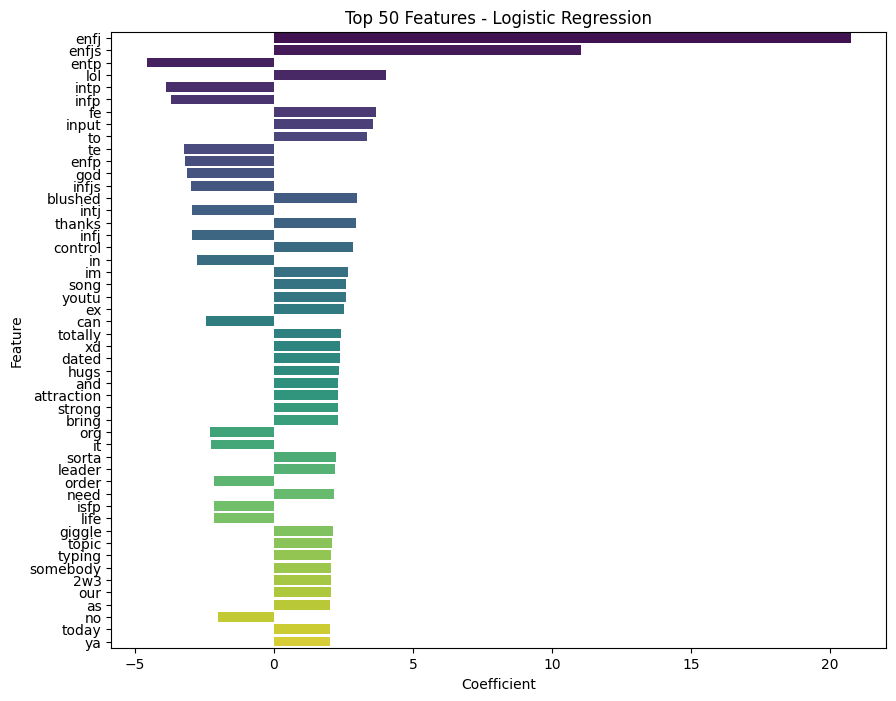

In [23]:
# Filter out FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
best_model = grid_search.best_estimator_

# Get feature names from the TF-IDF vectorizer
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Get coefficients from the best model
coefficients = best_model.coef_[0]  # Note the [0] to access the coefficients for the first class

# Create a DataFrame to store feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute values of coefficients in descending order
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Plot the top N features
top_n = 50  # You can adjust the number of features to display
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(top_n), palette='viridis')
plt.title('Top {} Features - Logistic Regression'.format(top_n))
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()
